In [1]:
#librerias
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

**Filtrado de datos**

1) Filtrado del dataset  del rendimiento academico 2021 de Alumnos de cuarto medio (edad = 17 y edad = 18) Ad portas de entrar a la universidad

In [2]:
df_rendimiento = pd.read_csv('Dataframes/20220302_Rendimiento_2021_20220131_WEB.csv', sep = ';',  decimal=",")
df_rendimiento

C:\Users\ibgar\AppData\Local\Temp\ipykernel_1720\3200872040.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rendimiento = pd.read_csv('Dataframes/20220302_Rendimiento_2021_20220131_WEB.csv', sep = ';',  decimal=",")


,AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.5,98,P,P,0
1,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.5,98,P,P,0
2,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,5.8,90,P,P,0
3,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,0.0,0,Y,Y,0
4,2021,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,1101,IQUIQUE,400,410,41001,4.1,70,R,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237038,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8110,TALCAHUANO,0,0,0,0.0,0,Y,Y,0
3237039,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,13125,QUILICURA,0,0,0,6.5,100,P,P,0
3237040,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8306,NACIMIENTO,0,0,0,5.0,100,P,P,0
3237041,2021,41955,9,ESCUELA HOSPITALARIA LOS ÁNGELES,8,BBIO,83,8301,LOS ÁNGELES,82,...,8301,LOS ÁNGELES,0,0,0,6.6,100,P,P,0


In [10]:
#Este codigo genera el dataframe filtrado del rendimiento
df_rendimiento = df_rendimiento[df_rendimiento['EDAD_ALU'] != ' ']
df_rendimiento_rm = df_rendimiento[df_rendimiento.COD_REG_RBD == 13]
df_rendimiento_rm = df_rendimiento_rm.loc[(df_rendimiento.EDAD_ALU == 18) | (df_rendimiento.EDAD_ALU == 17)]
df_rendimiento_rm_promedio = df_rendimiento_rm.groupby('NOM_COM_RBD').mean().reset_index()
df_rendimiento_rm_promedio = df_rendimiento_rm_promedio[['COD_COM_RBD','COD_DEPE2' ,'PROM_GRAL', 'ASISTENCIA']]
comunas = df_rendimiento[['COD_COM_RBD', 'NOM_COM_RBD']]
df_final_filtrado = pd.merge(df_rendimiento_rm_promedio, comunas, on = 'COD_COM_RBD')
df_final_filtrado = df_final_filtrado.drop_duplicates().reset_index()
df_final_filtrado = df_final_filtrado[['COD_COM_RBD','COD_DEPE2','PROM_GRAL','ASISTENCIA','NOM_COM_RBD']]
df_final_filtrado

,COD_COM_RBD,COD_DEPE2,PROM_GRAL,ASISTENCIA,NOM_COM_RBD
0,13502.0,1.000000,5.484932,81.178082,ALHUÉ
1,13402.0,1.504608,5.182028,76.610599,BUIN
2,13403.0,1.888889,5.629167,83.392361,CALERA DE TANGO
3,13102.0,2.000000,4.841667,85.937500,CERRILLOS
4,13103.0,5.000000,3.677381,57.619048,CERRO NAVIA
5,13301.0,1.915847,5.543060,88.567213,COLINA
6,13104.0,2.000000,5.470881,47.107280,CONCHALÍ
7,13503.0,1.380645,5.453763,83.374194,CURACAVÍ
8,13105.0,2.000000,5.223524,76.088109,EL BOSQUE
9,13602.0,1.000000,4.494615,72.246154,EL MONTE


In [11]:
df_final_filtrado.to_csv('Dataframes/rendimiento_promedio_filtrado_2021.csv',index = False)

Finalmente queda generado un dataframe con los datos promedios por comuna.

**Analisis exploratorio de datos**

Se plantea separar a los colegios para evaluar los resultados separandolos por tramos de calificaciones:
promedio menor a 5.0
promedio entre 5.0 y 5.5
promedio entre 5.5 y 5.9
promedio mayor a 5.9

In [22]:
df_filtrado_ploteable = df_final_filtrado[['NOM_COM_RBD', 'ASISTENCIA', 'PROM_GRAL']]
df_filtrado_ploteable=df_filtrado_ploteable.rename(columns = {'NOM_COM_RBD':'COMUNA'})
df_filtrado_ploteable

,COMUNA,ASISTENCIA,PROM_GRAL
0,ALHUÉ,81.178082,5.484932
1,BUIN,76.610599,5.182028
2,CALERA DE TANGO,83.392361,5.629167
3,CERRILLOS,85.937500,4.841667
4,CERRO NAVIA,57.619048,3.677381
5,COLINA,88.567213,5.543060
6,CONCHALÍ,47.107280,5.470881
7,CURACAVÍ,83.374194,5.453763
8,EL BOSQUE,76.088109,5.223524
9,EL MONTE,72.246154,4.494615


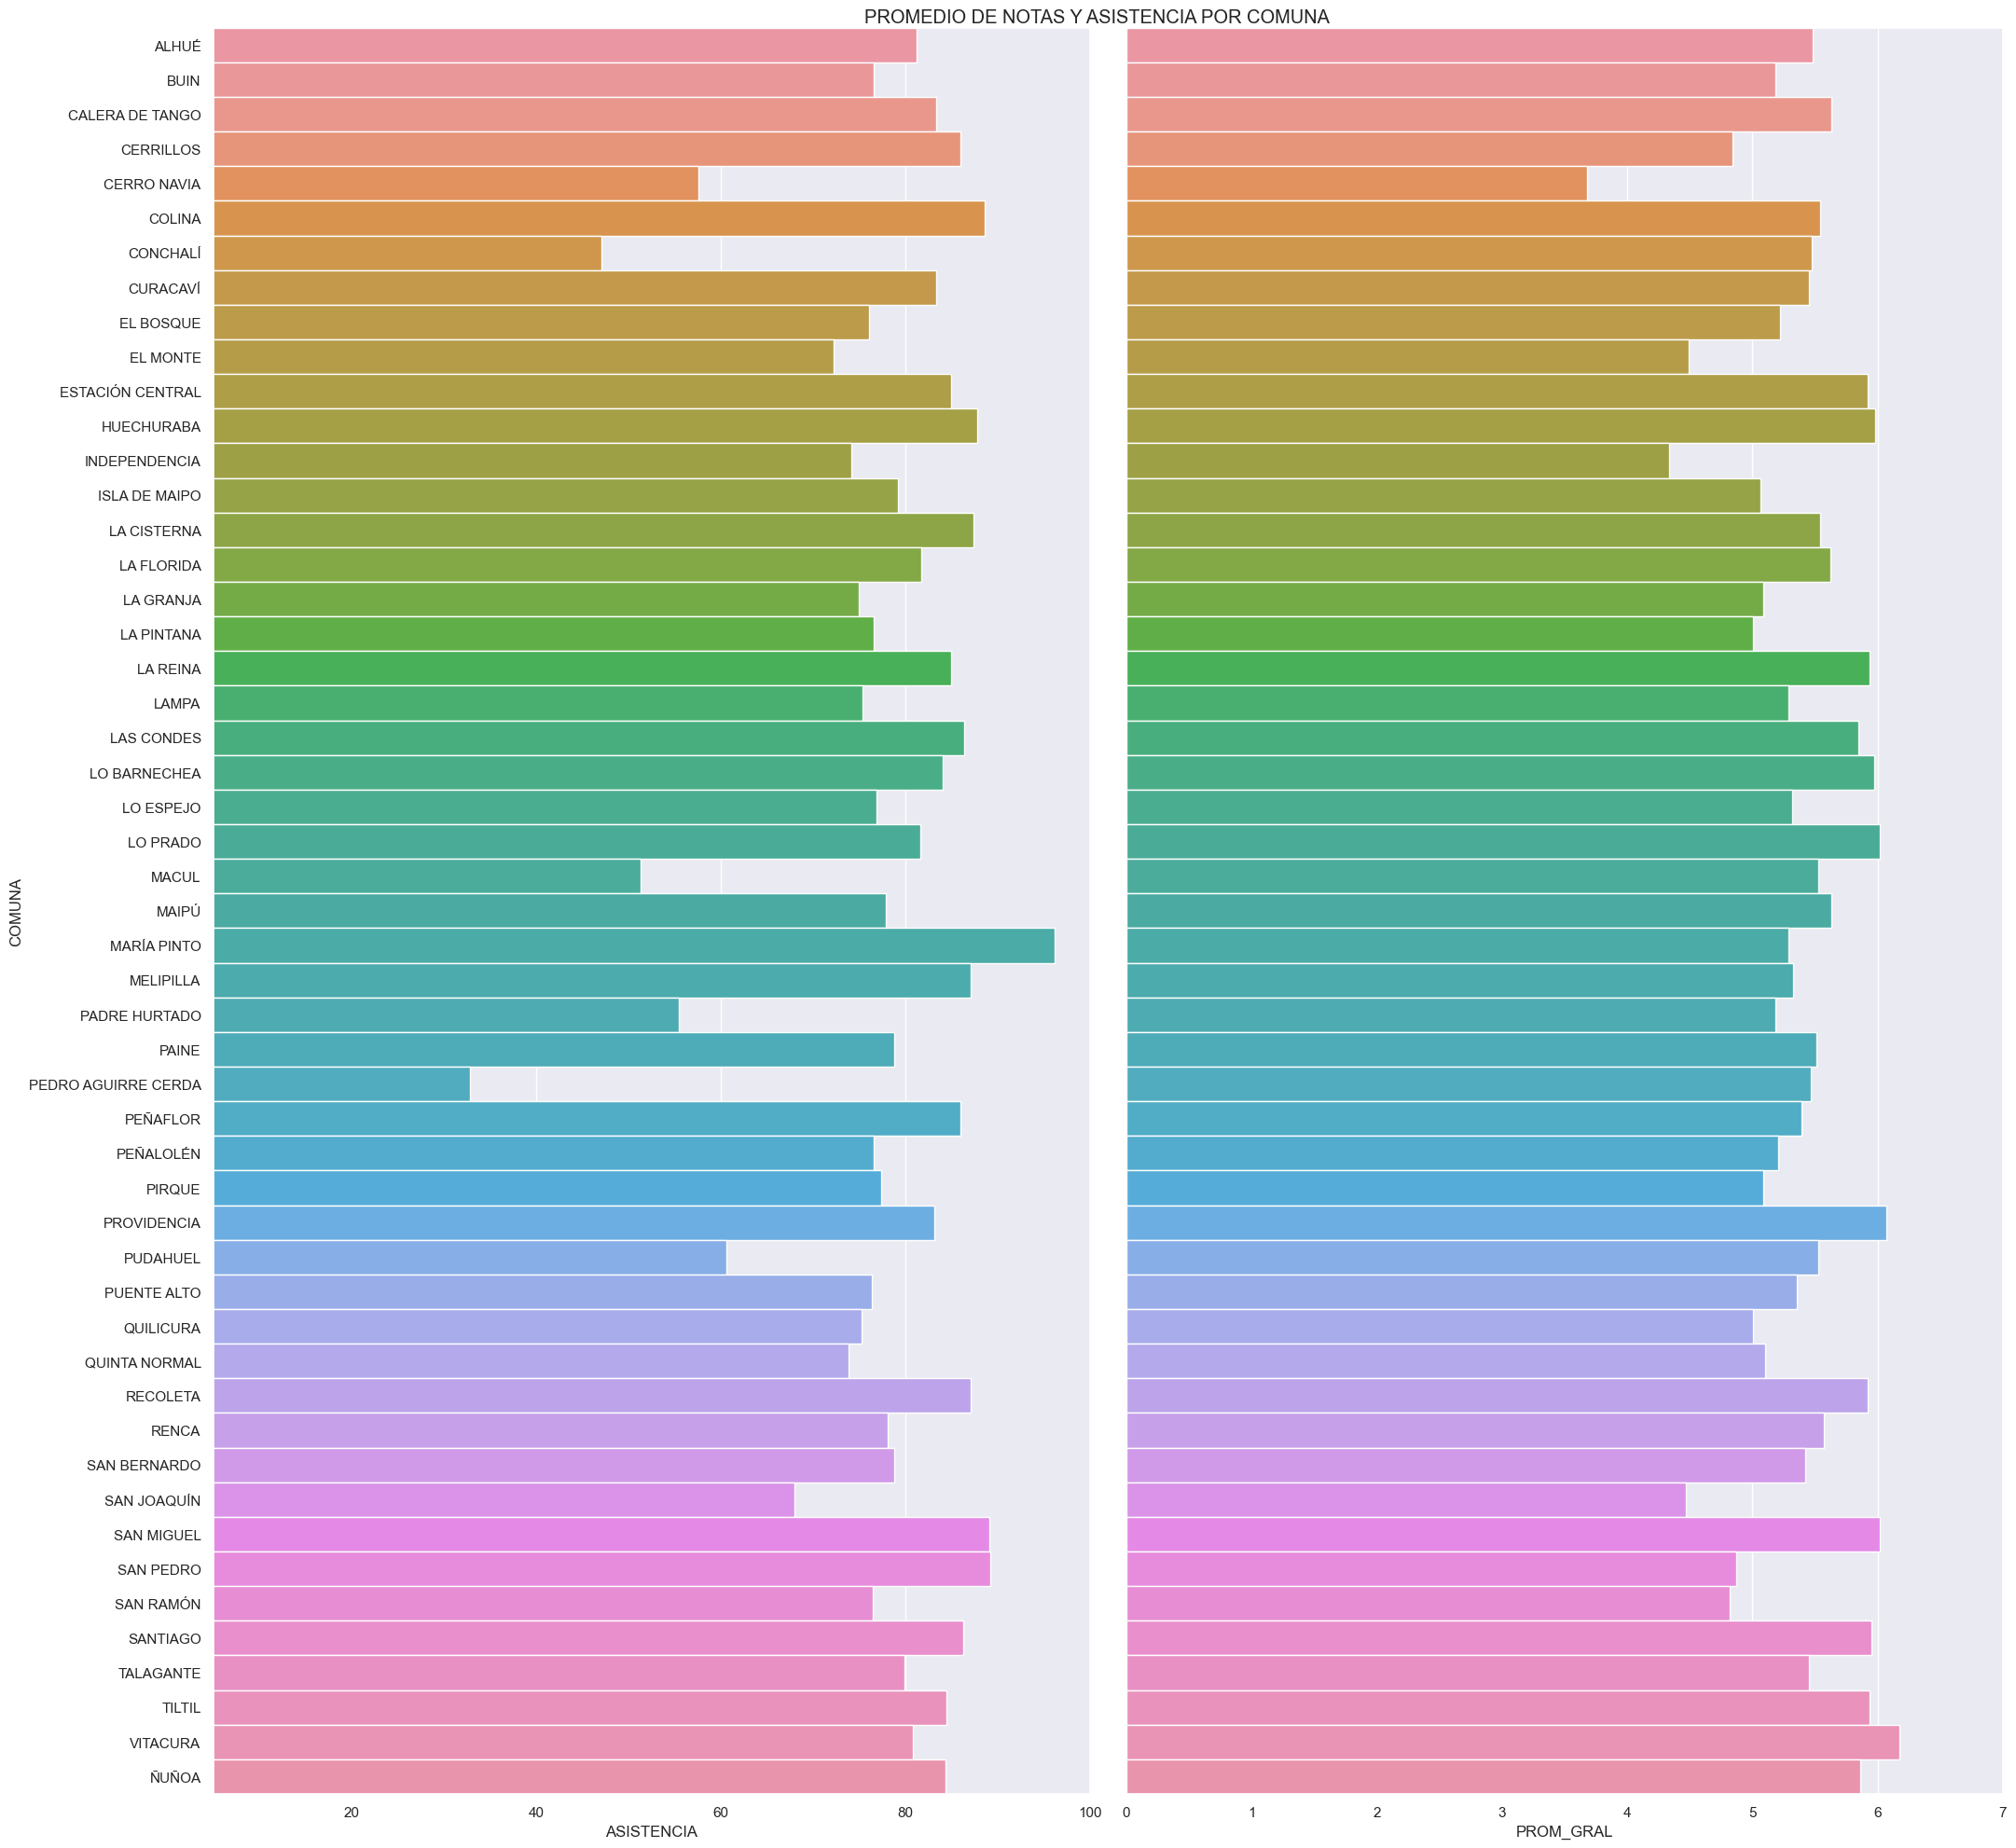

In [28]:
f, ax = plt.subplots(1,2, figsize=(20,20), sharey=True)
sns.set(font_scale=1)
cols = df_filtrado_ploteable.columns[1:]
f.suptitle("PROMEDIO DE NOTAS Y ASISTENCIA POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,100.0)
for i in range(0,2):
    if i != 0:
        if i == 1:
            ax[i].yaxis.set_visible(False)
            ax[i].set_xlim(0,7)
        else:
            ax[i].yaxis.set_visible(False)
            ax[i].set_xlim(0,200)

            
        
    sns.barplot(df_filtrado_ploteable, y="COMUNA", x=cols[i], ax=ax[i],width=1)


Notamos que si bien las comunas con mas ingresos son aquellas que estan en el intervalo mas alto de calificaciones en promedio, no necesariamente eso significa que sea debido a la cantidad de ingresos ya que existen otras comunas de menores ingresos que tambien poseen resultados altos.